In [1]:
library(data.table)
library(dtplyr)
library(knitr)
library(repr)
library(Hmisc)
library(hexbin)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
options(repr.plot.width=6, repr.plot.height=4.5)

In [22]:
DT = fread('~/pfr-teams.csv', header=TRUE)
DT = DT[team!='Avg Team']

In [23]:
DT$team = as.factor(DT$team)
DT$fseason = as.factor(DT$season)

In [24]:
DT$rp_ratio = DT$rush_att / DT$pass_att
DT$pass_pct = DT$pass_att / DT$plays_offense * 100
DT$rush_pct = DT$rush_att / DT$plays_offense * 100
DT$fumble_pct = DT$fumbles / DT$plays_offense * 100

In [25]:
DT$fpts = (DT$pass_yds * .14) + (DT$pass_td * 10) + (DT$rush_yds * .1) + (DT$rush_td * 6) - (DT$pass_int * 2) - (DT$fumbles_lost * 2)
DT$fpts_pass = (DT$pass_yds * .14) + (DT$pass_td * 10) - (DT$pass_int * 2)
DT$fpts_rush = (DT$rush_yds * .1) + (DT$rush_td * 6) - (DT$fumbles_lost * 2)

In [26]:
DT.2010 = DT[season>=2010]
DT.2015 = DT[season==2015]

# Fantasy Points

In [16]:
summary(DT$fpts / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.16   50.45   56.92   57.41   63.93   96.47 

In [20]:
summary(DT$fpts_pass / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.98   35.71   41.62   42.53   48.57   80.76 

In [19]:
summary(DT$fpts_rush / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.863  12.110  14.470  14.880  17.160  27.360 

In [27]:
summary(DT.2010$fpts / DT.2010$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.19   53.52   60.00   60.78   68.02   96.47 

In [28]:
summary(DT.2010$fpts_pass / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.03   39.50   44.39   46.16   53.18   80.76 

In [30]:
summary(DT.2010$fpts_rush / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.625  12.020  14.410  14.720  17.030  24.430 

In [31]:
summary(DT.2015$fpts / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.89   58.51   62.70   62.82   68.92   77.25 

In [32]:
summary(DT.2015$fpts_pass / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.04   43.83   49.18   48.86   53.90   61.99 

In [33]:
summary(DT.2015$fpts_rush / DT$g)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.612  11.360  13.440  13.960  16.550  21.080 

# Plays Per Season

In [21]:
summary(DT$plays_offense)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    859     980    1014    1011    1041    1191 

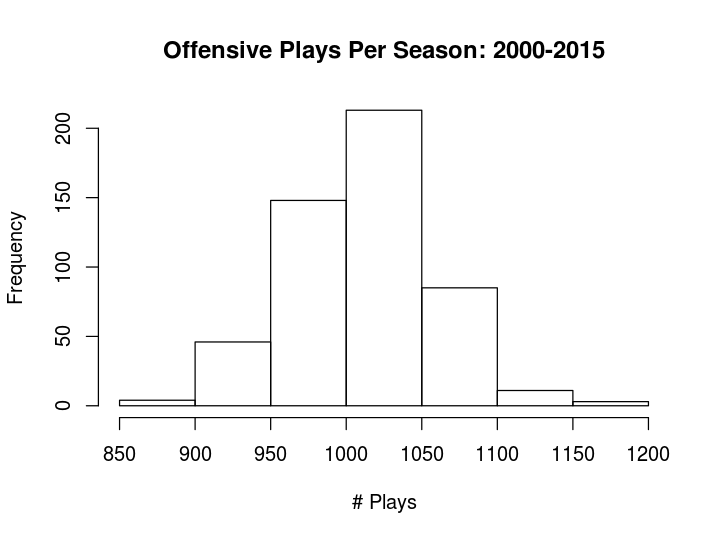

In [22]:
hist(DT$plays_offense, main='Offensive Plays Per Season: 2000-2015', xlab='# Plays')

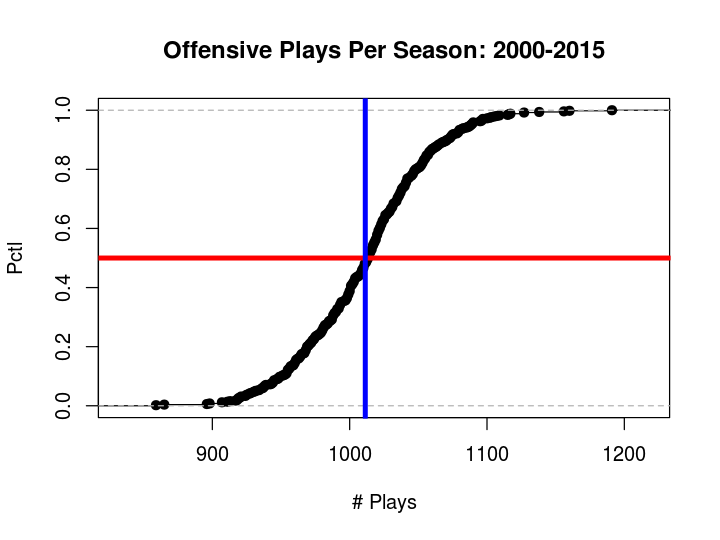

In [25]:
plot(ecdf(DT$plays_offense), main='Offensive Plays Per Season: 2000-2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT$plays_offense), col='blue', lwd=4)

## Plays Per Season: 2010-2015

In [16]:
summary(DT[season >= 2010, plays_offense])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    907     994    1020    1025    1053    1191 

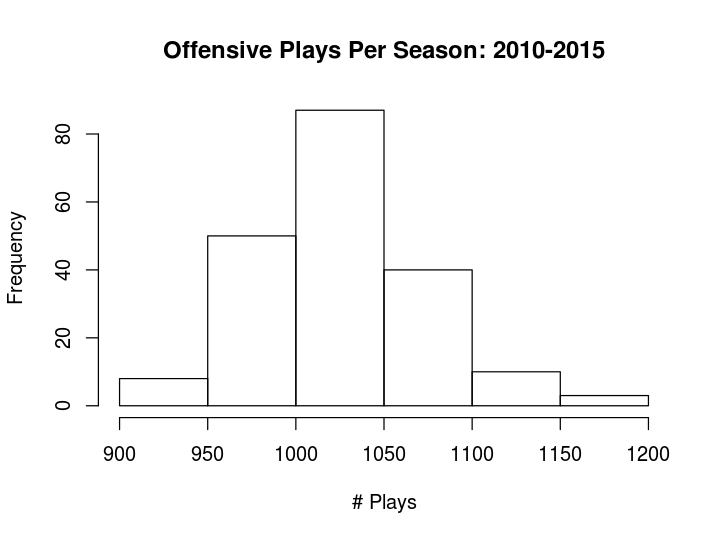

In [17]:
hist(DT[season>=2010, plays_offense], main='Offensive Plays Per Season: 2010-2015', xlab='# Plays')

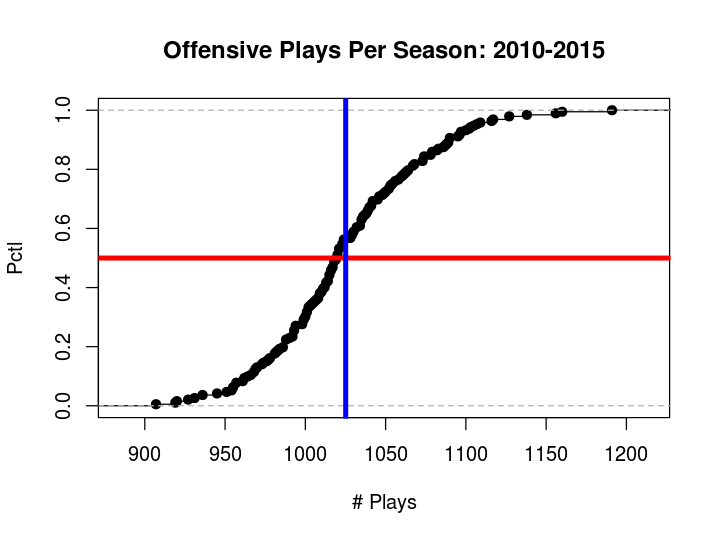

In [26]:
plot(ecdf(DT[season>=2010,plays_offense]), main='Offensive Plays Per Season: 2010-2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT[season>=2010,plays_offense]), col='blue', lwd=4)

## Plays Per Season: 2015

In [27]:
summary(DT[season==2015, plays_offense])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    920    1008    1032    1030    1057    1127 

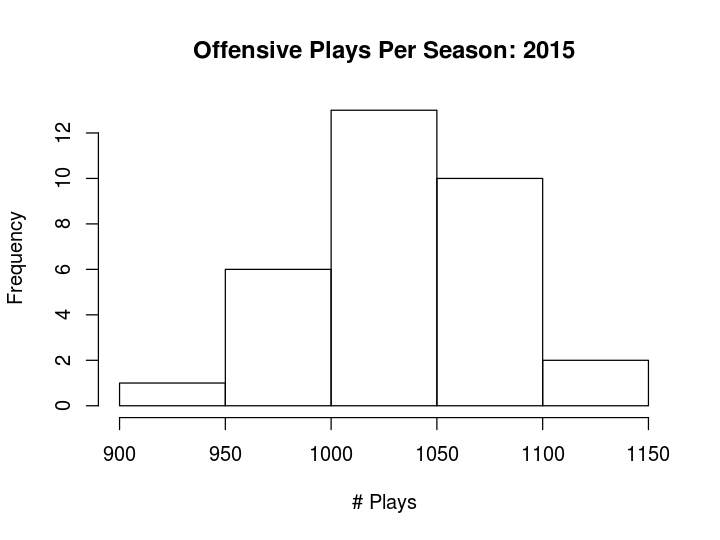

In [31]:
hist(DT[season==2015, plays_offense], main='Offensive Plays Per Season: 2015', xlab='# Plays')

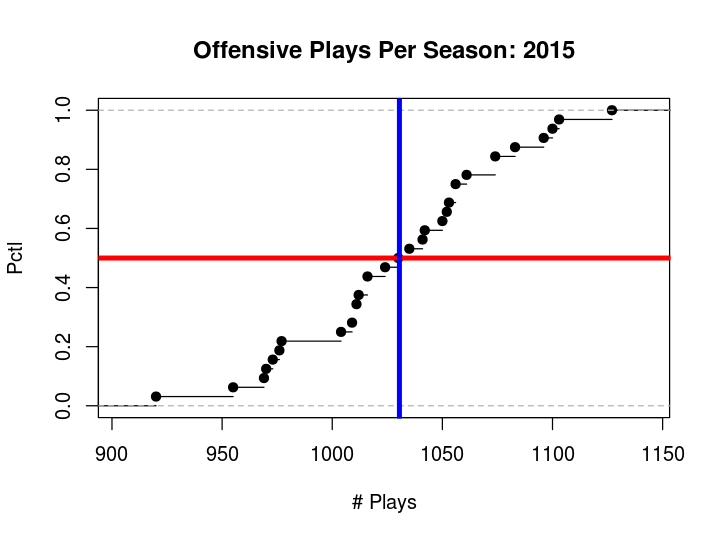

In [30]:
plot(ecdf(DT[season==2015,plays_offense]), main='Offensive Plays Per Season: 2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT[season==2015,plays_offense]), col='blue', lwd=4)

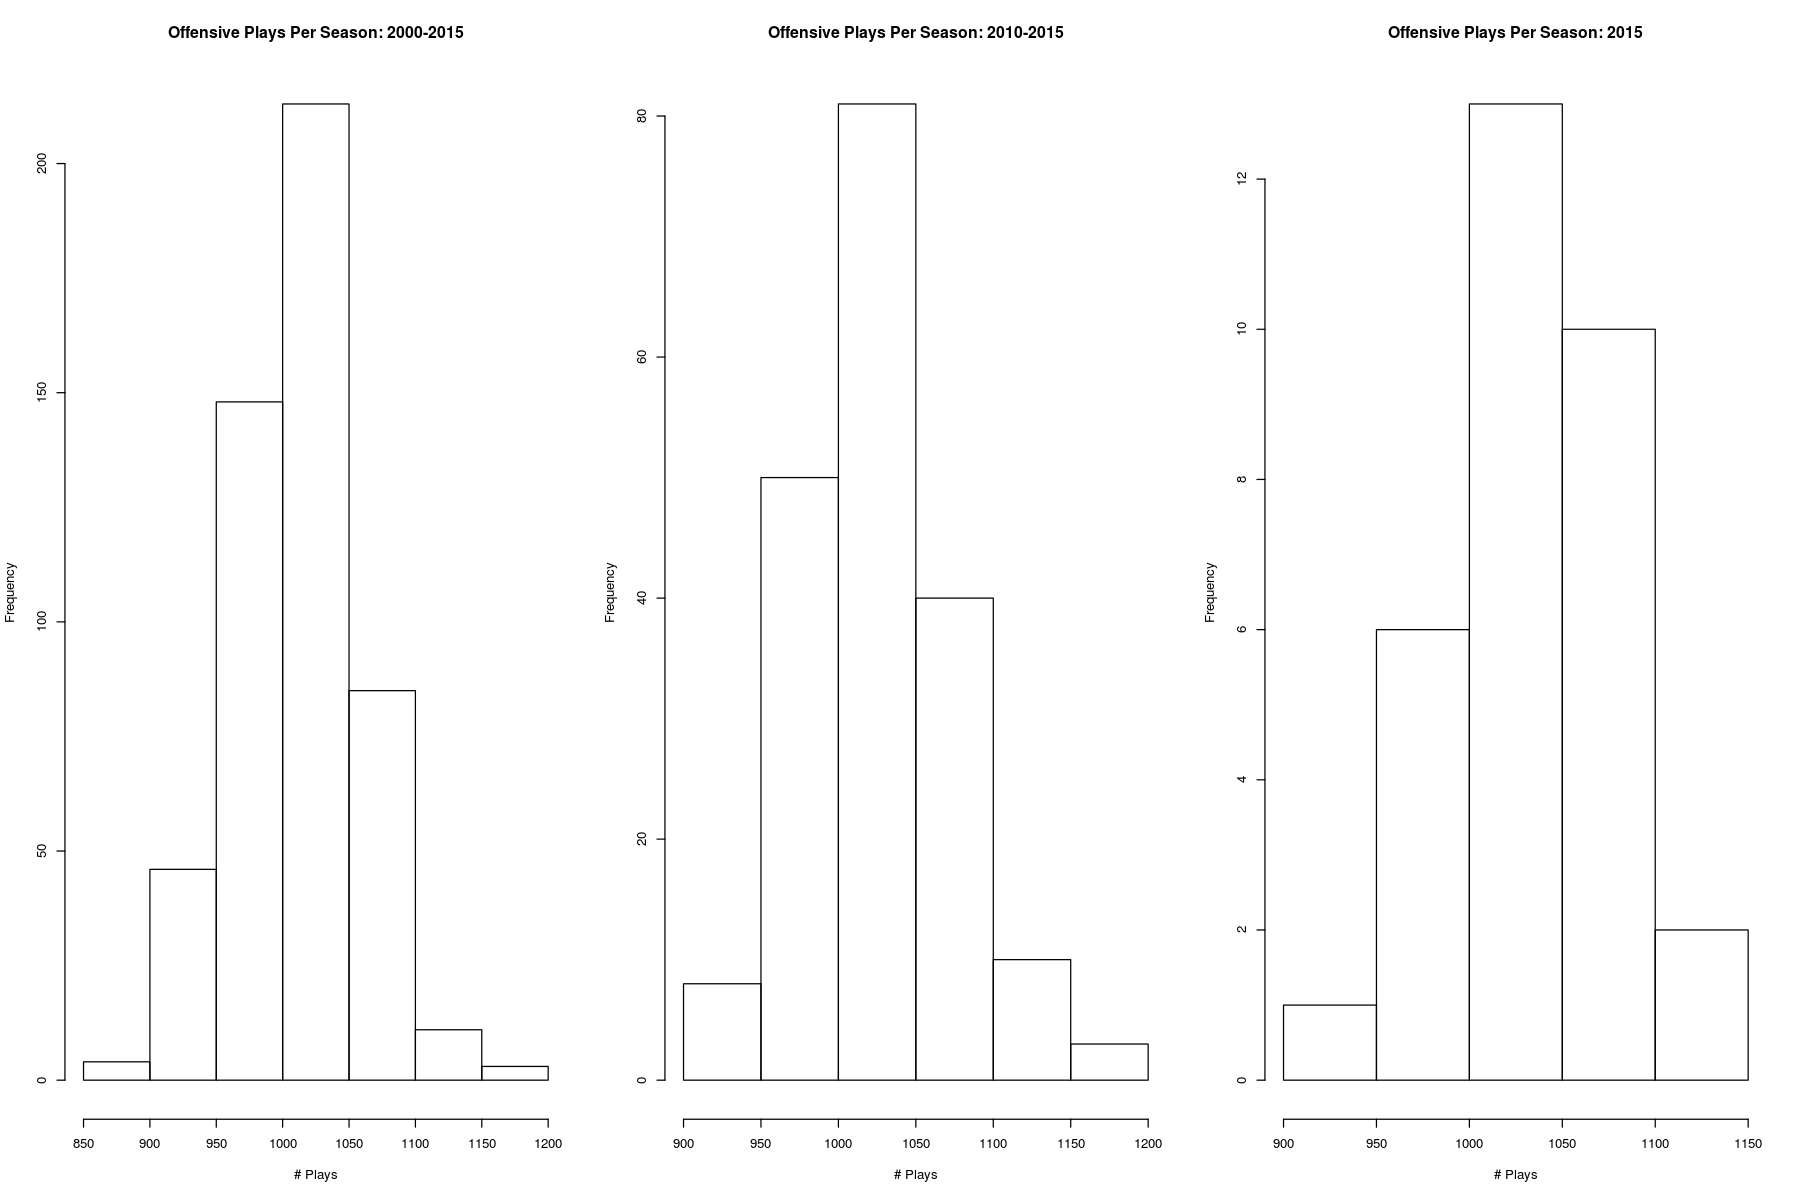

In [40]:
options(repr.plot.width=15, repr.plot.height=10)
old.par <- par(mfrow=c(1, 3))
hist(DT$plays_offense, main='Offensive Plays Per Season: 2000-2015', xlab='# Plays')
hist(DT[season>=2010, plays_offense], main='Offensive Plays Per Season: 2010-2015', xlab='# Plays')
hist(DT[season==2015, plays_offense], main='Offensive Plays Per Season: 2015', xlab='# Plays')
par(old.par)

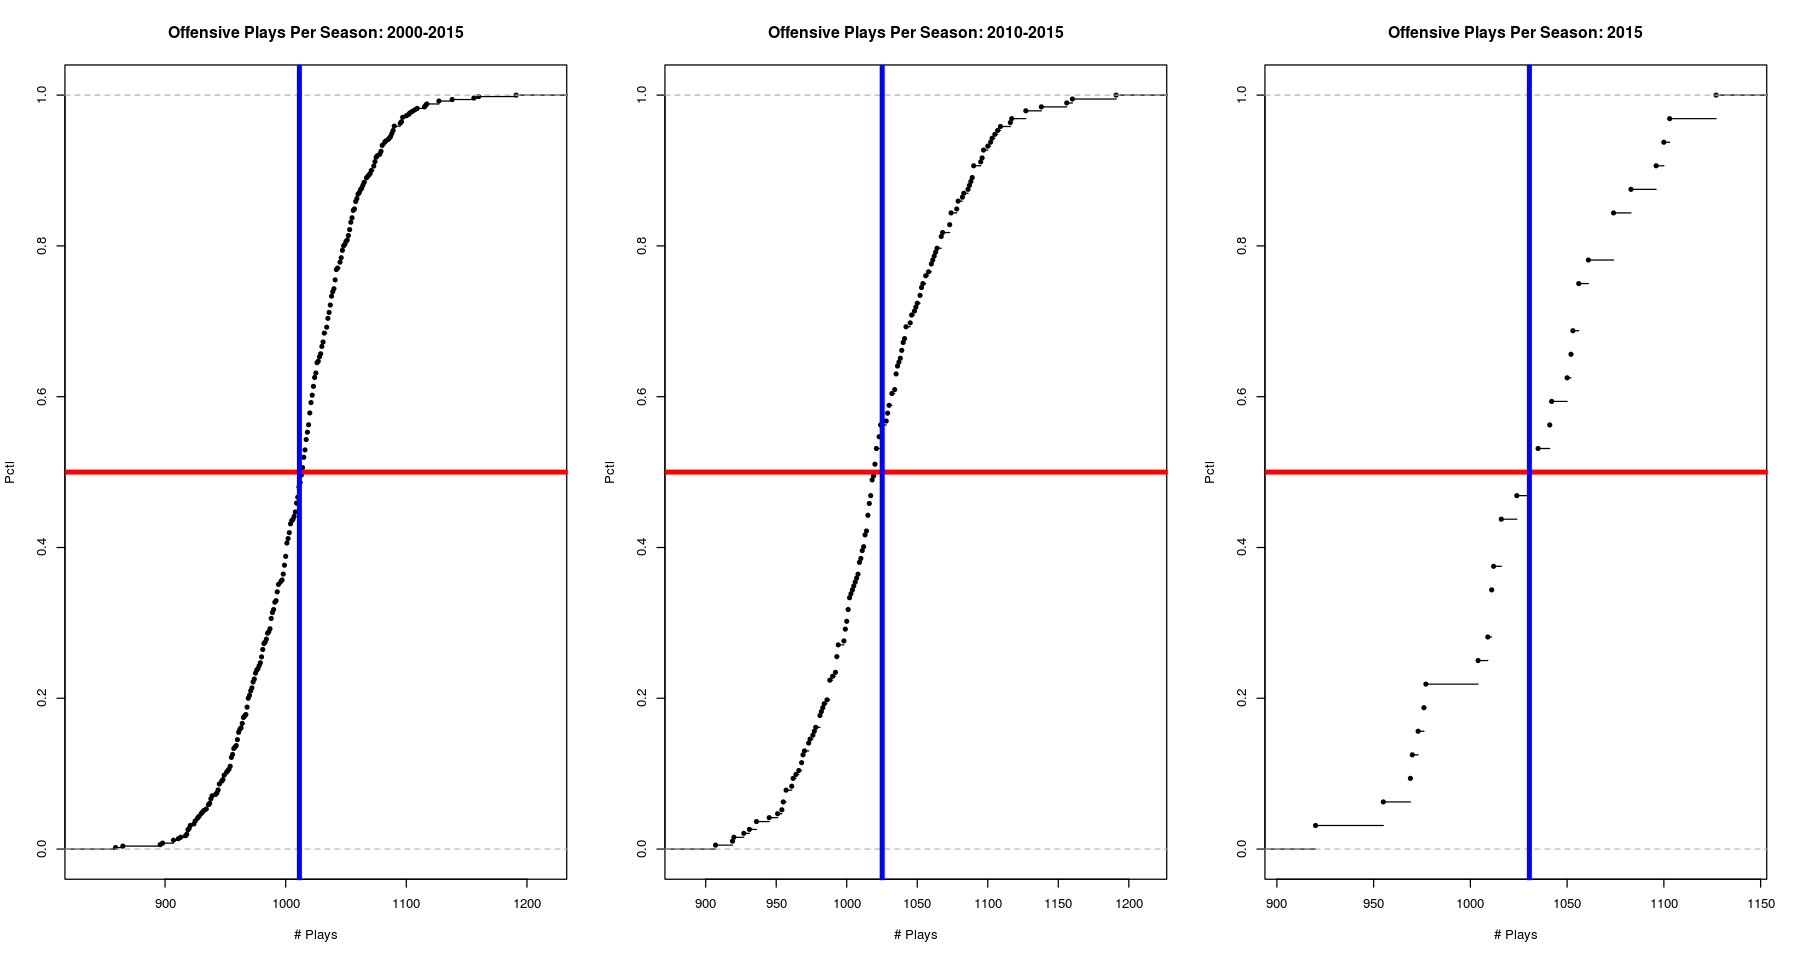

In [42]:
options(repr.plot.width=15, repr.plot.height=8)
old.par <- par(mfrow=c(1, 3))

plot(ecdf(DT$plays_offense), main='Offensive Plays Per Season: 2000-2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT$plays_offense), col='blue', lwd=4)

plot(ecdf(DT[season>=2010,plays_offense]), main='Offensive Plays Per Season: 2010-2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT[season>=2010,plays_offense]), col='blue', lwd=4)

plot(ecdf(DT[season==2015,plays_offense]), main='Offensive Plays Per Season: 2015', xlab='# Plays', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT[season==2015,plays_offense]), col='blue', lwd=4)

par(old.par)

# Run / Pass Ratio

In [43]:
summary(DT$rush_att/DT$pass_att)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4871  0.7053  0.8090  0.8396  0.9466  1.7260 

In [59]:
summary(DT$rush_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3135  0.3990  0.4314  0.4351  0.4672  0.6107 

In [60]:
summary(DT$pass_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3538  0.4945  0.5325  0.5286  0.5634  0.6436 

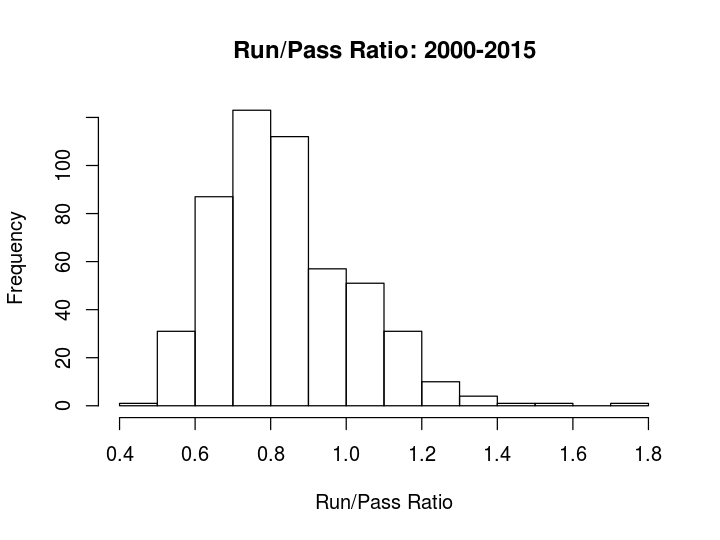

In [45]:
options(repr.plot.width=6, repr.plot.height=4.5)
hist(DT$rush_att/DT$pass_att, main='Run/Pass Ratio: 2000-2015', xlab='Run/Pass Ratio')

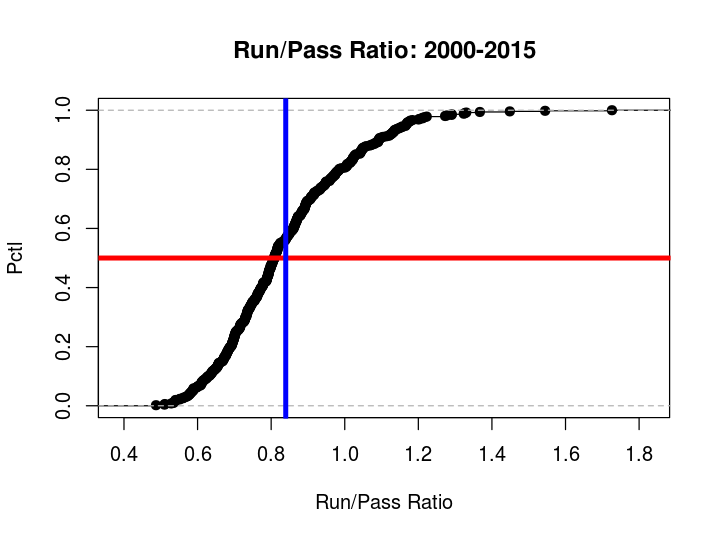

In [46]:
plot(ecdf(DT$rp_ratio), main='Run/Pass Ratio: 2000-2015', xlab='Run/Pass Ratio', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT$rp_ratio), col='blue', lwd=4)

In [62]:
DT.2010 = DT[season>=2010]
summary(DT.2010$rp_ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4871  0.6757  0.7626  0.7926  0.8853  1.3230 

In [63]:
summary(DT.2010$rush_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3135  0.3870  0.4160  0.4214  0.4517  0.5503 

In [64]:
summary(DT.2010$pass_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4158  0.5136  0.5447  0.5419  0.5730  0.6436 

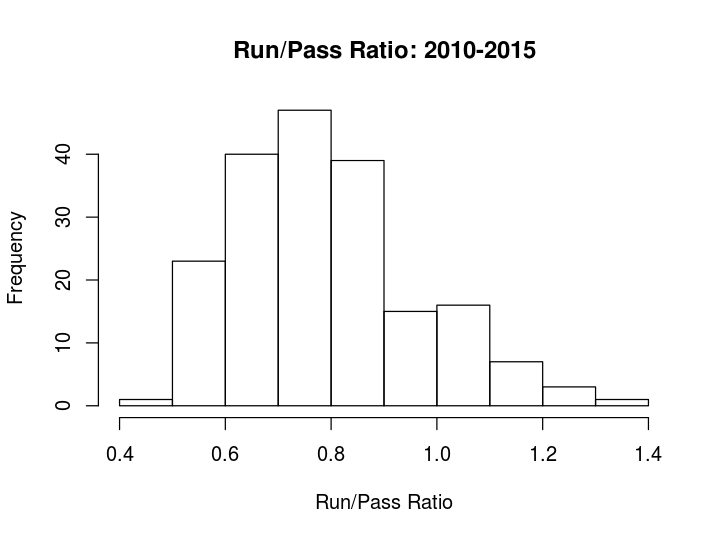

In [53]:
hist(DT.2010$rp_ratio, main='Run/Pass Ratio: 2010-2015', xlab='Run/Pass Ratio')

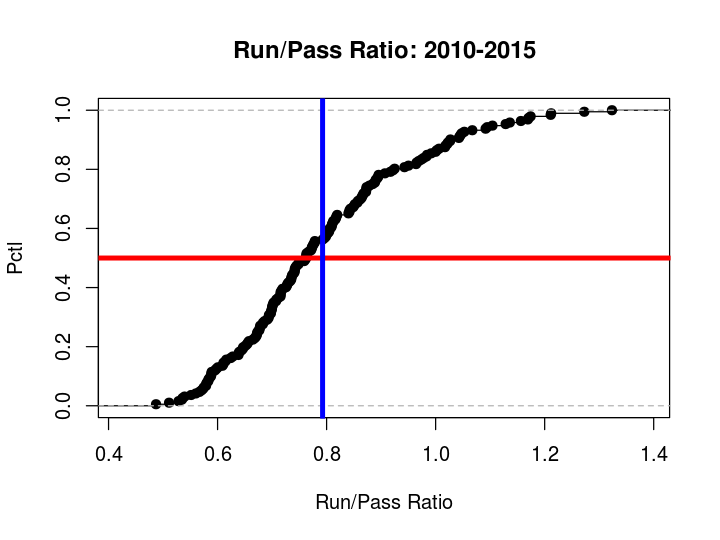

In [54]:
plot(ecdf(DT.2010$rp_ratio), main='Run/Pass Ratio: 2010-2015', xlab='Run/Pass Ratio', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT.2010$rp_ratio), col='blue', lwd=4)

In [65]:
DT.2015 = DT[season==2015]
summary(DT.2015$rp_ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5601  0.6206  0.7263  0.7521  0.8602  1.0950 

In [66]:
summary(DT.2015$rush_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3437  0.3662  0.4021  0.4097  0.4493  0.5010 

In [67]:
summary(DT.2015$pass_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4577  0.5235  0.5635  0.5542  0.5935  0.6242 

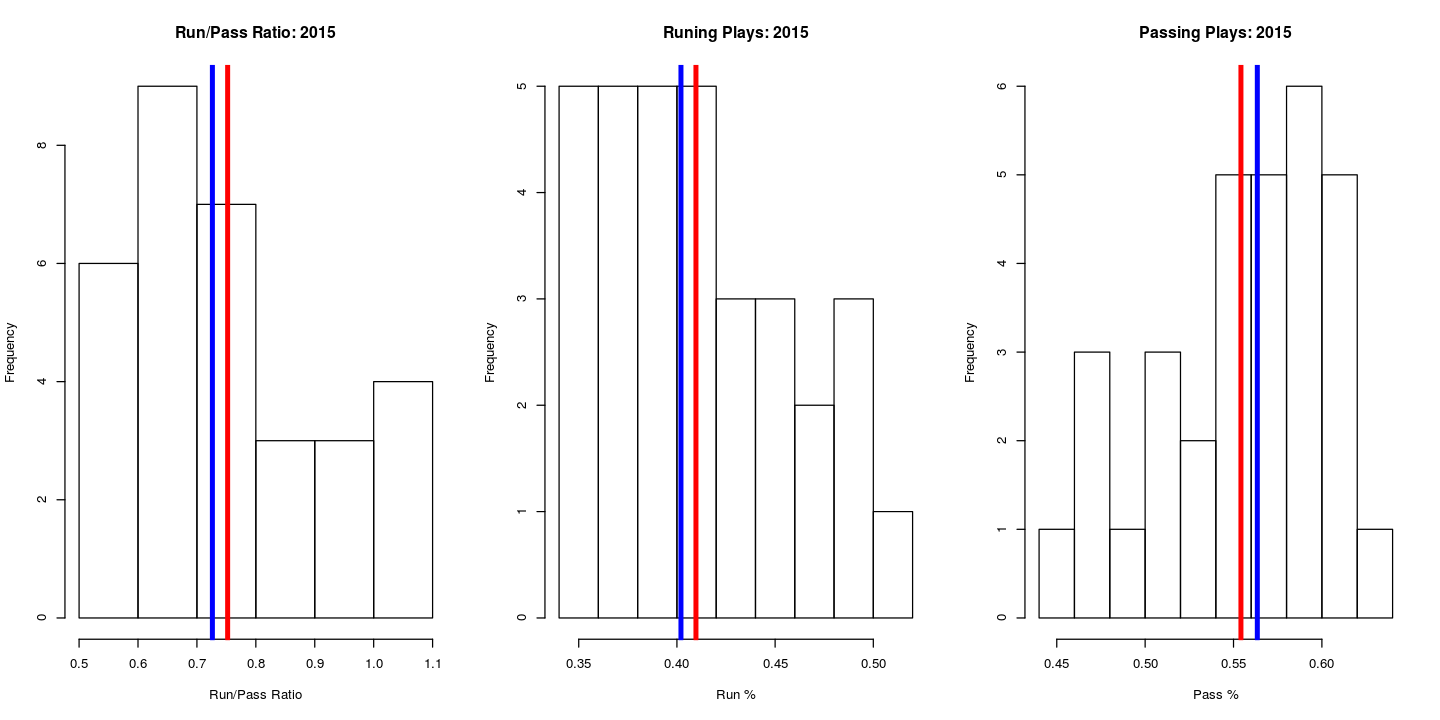

In [75]:
options(repr.plot.width=12, repr.plot.height=6)
old.par <- par(mfrow=c(1, 3))
hist(DT.2015$rp_ratio, main='Run/Pass Ratio: 2015', xlab='Run/Pass Ratio')
abline(v=median(DT.2015$rp_ratio), lwd=4, col='blue')
abline(v=mean(DT.2015$rp_ratio), lwd=4, col='red')
hist(DT.2015$rush_pct, main='Runing Plays: 2015', xlab='Run %')
abline(v=median(DT.2015$rush_pct), lwd=4, col='blue')
abline(v=mean(DT.2015$rush_pct), lwd=4, col='red')
hist(DT.2015$pass_pct, main='Passing Plays: 2015', xlab='Pass %')
abline(v=median(DT.2015$pass_pct), lwd=4, col='blue')
abline(v=mean(DT.2015$pass_pct), lwd=4, col='red')
par(old.par)

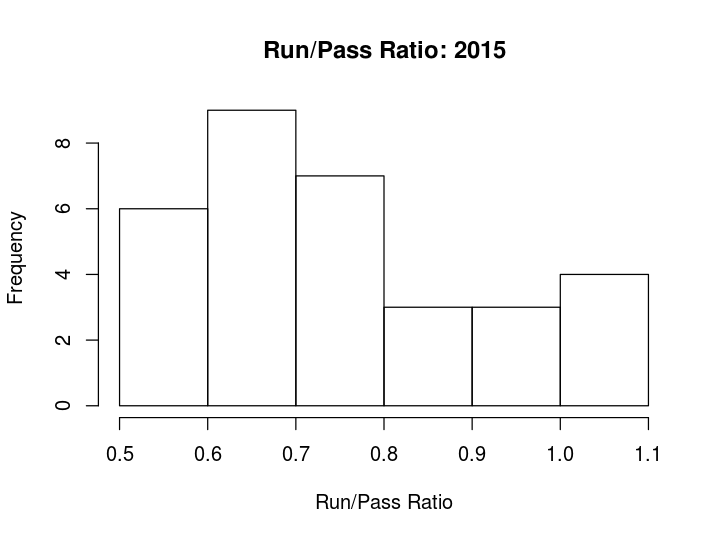

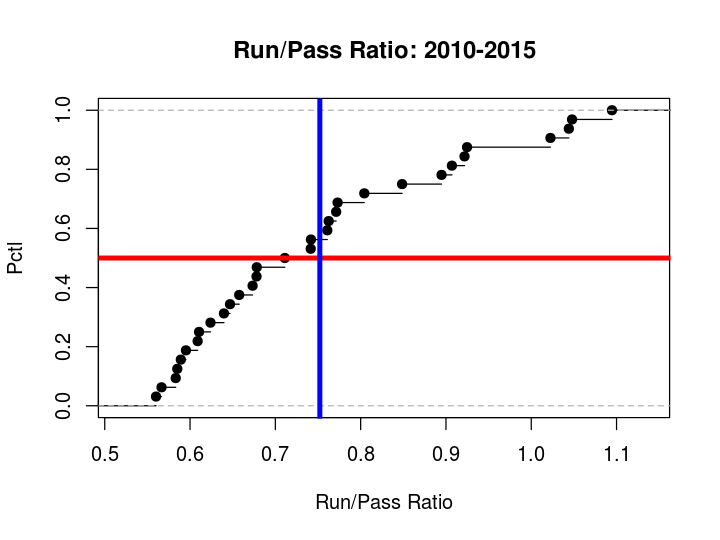

In [57]:
plot(ecdf(DT.2015$rp_ratio), main='Run/Pass Ratio: 2010-2015', xlab='Run/Pass Ratio', ylab='Pctl')
abline(h=.5, col='red', lwd=4)
abline(v=mean(DT.2015$rp_ratio), col='blue', lwd=4)

# Sacks Allowed

In [27]:
summary(DT$pass_sacked)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   28.00   36.00   36.58   44.00   76.00 

In [28]:
summary(DT$turnover_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.20   11.20   13.30   13.46   15.60   25.00 

In [29]:
summary(DT$pass_int_perc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.30    3.00    2.98    3.60    5.50 

In [30]:
summary(DT$fumble_pct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5372  1.8700  2.3030  2.3110  2.6820  4.2000 

In [31]:
DT.tov = DT[,.(pass_sacked_perc, pass_int_perc, fumble_pct, turnover_pct, pass_cmp_perc, pass_pct, rush_pct)]


In [32]:
cor(DT.tov)

,pass_sacked_perc,pass_int_perc,fumble_pct,turnover_pct,pass_cmp_perc,pass_pct,rush_pct
pass_sacked_perc,1.0000000,0.2189614,0.4115263,0.1430739,-0.3383029,-0.3485385,0.1258612
pass_int_perc,0.218961408,1.000000000,0.371418357,0.797481349,-0.443154784,-0.055312845,0.005428505
fumble_pct,0.41152633,0.37141836,1.00000000,0.55044267,-0.35812046,-0.10561413,0.01111962
turnover_pct,0.1430739,0.7974813,0.5504427,1.0000000,-0.2517361,0.2193225,-0.2676937
pass_cmp_perc,-0.3383029,-0.4431548,-0.3581205,-0.2517361,1.0000000,0.2324642,-0.1633492
pass_pct,-0.34853847,-0.05531284,-0.10561413,0.21932247,0.23246425,1.00000000,-0.97349854
rush_pct,0.125861171,0.005428505,0.011119621,-0.267693653,-0.163349211,-0.973498544,1.000000000


In [33]:
rcorr(as.matrix(DT.tov))

                 pass_sacked_perc pass_int_perc fumble_pct turnover_pct
pass_sacked_perc             1.00          0.22       0.41         0.14
pass_int_perc                0.22          1.00       0.37         0.80
fumble_pct                   0.41          0.37       1.00         0.55
turnover_pct                 0.14          0.80       0.55         1.00
pass_cmp_perc               -0.34         -0.44      -0.36        -0.25
pass_pct                    -0.35         -0.06      -0.11         0.22
rush_pct                     0.13          0.01       0.01        -0.27
                 pass_cmp_perc pass_pct rush_pct
pass_sacked_perc         -0.34    -0.35     0.13
pass_int_perc            -0.44    -0.06     0.01
fumble_pct               -0.36    -0.11     0.01
turnover_pct             -0.25     0.22    -0.27
pass_cmp_perc             1.00     0.23    -0.16
pass_pct                  0.23     1.00    -0.97
rush_pct                 -0.16    -0.97     1.00

n= 510 


P
                 pa

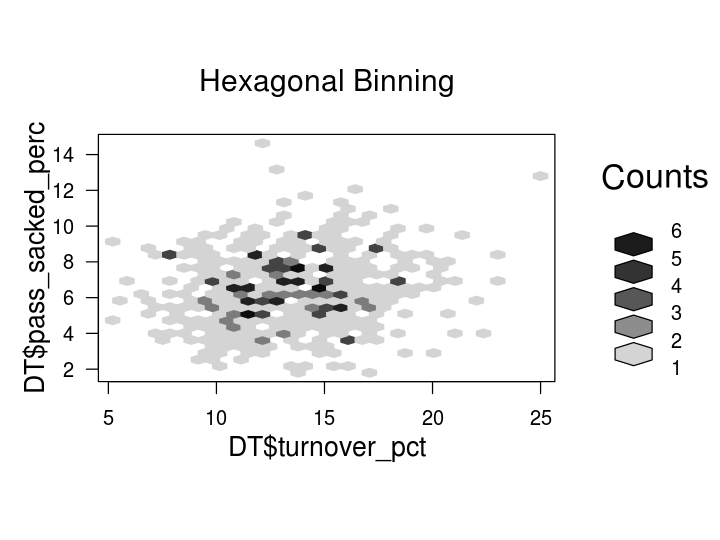

In [35]:
bin<-hexbin(DT$turnover_pct, DT$pass_sacked_perc)
plot(bin, main="Hexagonal Binning") 